In [67]:
import os
main_dir = os.path.dirname(os.path.dirname(os.getcwd()))
os.chdir(main_dir)

import pyvdirs.dirs as dirs
import sys
sys.path.insert(0, dirs.SYSTEM_HOME)
sys.path.insert(0, os.path.join(dirs.SYSTEM_HOME, "ToyExample"))

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# W&B Plots' Data

## Parameters

In [85]:
dir_results = os.path.join(dirs.RESULTS_HOME, "Images", "04_Main_Results")

In [86]:
series = ["Baseline", "Early AJEST", "AJEST", "Random"]
plt_kwargs = dict(color = ["C0", "C3", "C4", "C1"],
                  alpha = [0.5, 0.8, 0.7, 0.6],
                  linewidth = [4, 1, 0.5, 0.5],
                  zorder=[1000,10000,100,10])
plt_kwargs = {s:{k:v[i] for k,v in plt_kwargs.items()} for i,s in enumerate(series)}

results = {}

## Time

### Load data into Pandas

In [109]:
pandas_data = pd.read_csv(os.path.join(dir_results, "Main_Results_Loss_vs_Time.csv"))

In [110]:
pandas_data

,Training Time [sec],Training time [hs],Group: 06_CorrectEMA_AJEST_00 - Loss,Group: 06_CorrectEMA_Early_AJEST_00 - Loss,Group: 06_CorrectEMA_Random_00 - Loss,Group: 04_Tiny_LR_Baseline_04 - Loss,Group: 04_Tiny_LR_Ref_00 - Loss
0,1.055769e+04,0.002933,NaN,NaN,20.138007,NaN,NaN
1,1.129142e+04,0.003137,NaN,NaN,NaN,NaN,15.073979
2,1.143390e+04,0.003176,NaN,NaN,NaN,NaN,15.128112
3,1.543995e+04,0.004289,38.754126,NaN,NaN,NaN,NaN
4,1.671881e+04,0.004644,NaN,NaN,NaN,NaN,14.986211
...,...,...,...,...,...,...,...
65467,1.727988e+08,47.999678,NaN,-9.626287,NaN,NaN,NaN
65468,1.728010e+08,48.000283,NaN,NaN,NaN,-10.320302,NaN
65469,1.728093e+08,48.002574,NaN,NaN,-8.109115,NaN,NaN
65470,1.728143e+08,48.003983,NaN,-10.160560,NaN,NaN,NaN


### Preprocess with Pandas

In [111]:
pandas_data = pandas_data.rename(columns={"Group: 06_CorrectEMA_AJEST_00 - Loss":"AJEST",
                                          "Group: 06_CorrectEMA_Early_AJEST_00 - Loss":"Early AJEST",
                                          "Group: 06_CorrectEMA_Random_00 - Loss":"Random",
                                          "Group: 04_Tiny_LR_Baseline_04 - Loss":"Baseline",
                                          "Group: 04_Tiny_LR_Ref_00 - Loss":"Reference"})

### Get data in Numpy

In [112]:
results["time"] = {}
for s in series:
    results["time"][s] = {}
    results["time"][s]["time"], results["time"][s]["loss"] = pandas_data[["Training time [hs]",s]][pd.notna(pandas_data[s])].to_numpy().T

### Plot

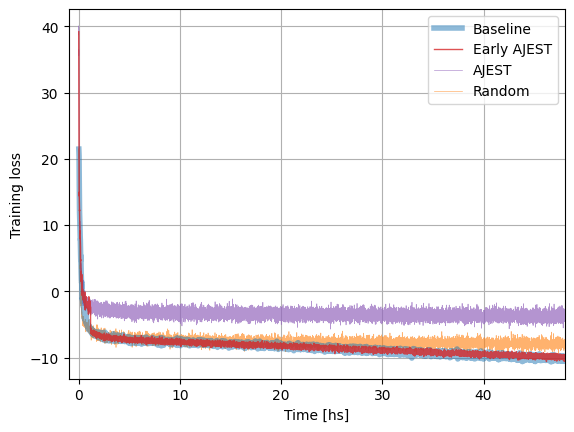

In [133]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["time"][s]["time"], results["time"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Time [hs]")
plt.ylabel("Training loss")
plt.xlim([-1, 48])
plt.grid()

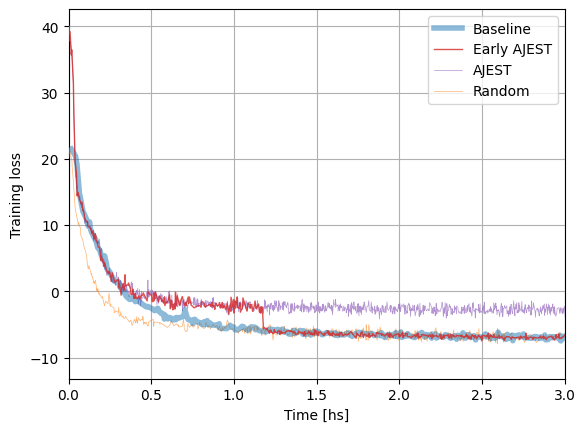

In [134]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["time"][s]["time"], results["time"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Time [hs]")
plt.ylabel("Training loss")
# plt.xlim([-1, 48])
plt.xlim([0, 3])
plt.grid()

## Epoch

### Load data into Pandas

In [135]:
pandas_data = pd.read_csv(os.path.join(dir_results, "Main_Results_Loss_vs_Epoch.csv"))

In [136]:
pandas_data

,Epoch,Group: 06_CorrectEMA_AJEST_00 - _step,Group: 06_CorrectEMA_AJEST_00 - _step__MIN,Group: 06_CorrectEMA_AJEST_00 - _step__MAX,Group: 06_CorrectEMA_AJEST_00 - Loss,Group: 06_CorrectEMA_AJEST_00 - Loss__MIN,Group: 06_CorrectEMA_AJEST_00 - Loss__MAX,Group: 06_CorrectEMA_Early_AJEST_00 - _step,Group: 06_CorrectEMA_Early_AJEST_00 - _step__MIN,Group: 06_CorrectEMA_Early_AJEST_00 - _step__MAX,...,Group: 04_Tiny_LR_Baseline_04 - _step__MAX,Group: 04_Tiny_LR_Baseline_04 - Loss,Group: 04_Tiny_LR_Baseline_04 - Loss__MIN,Group: 04_Tiny_LR_Baseline_04 - Loss__MAX,Group: 04_Tiny_LR_Ref_00 - _step,Group: 04_Tiny_LR_Ref_00 - _step__MIN,Group: 04_Tiny_LR_Ref_00 - _step__MAX,Group: 04_Tiny_LR_Ref_00 - Loss,Group: 04_Tiny_LR_Ref_00 - Loss__MIN,Group: 04_Tiny_LR_Ref_00 - Loss__MAX
0,0,8.0,8.0,8.0,38.377435,38.000744,38.754126,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,4.0,4.0,14.962896,14.838368,15.087425
1,1,18.0,18.0,18.0,38.953883,37.824091,40.083675,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,27.0,27.0,27.0,...,27.0,21.979856,21.979856,21.979856,NaN,NaN,NaN,NaN,NaN,NaN
3,3,36.0,36.0,36.0,37.956989,37.645382,38.268596,NaN,NaN,NaN,...,36.0,21.414513,21.414513,21.414513,19.0,19.0,19.0,14.950516,14.914821,14.986211
4,4,45.0,45.0,45.0,36.624354,35.902883,37.345825,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44519,81805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,743954.0,-14.074966,-14.074966,-14.074966,NaN,NaN,NaN,NaN,NaN,NaN
44520,81809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,743790.0,-13.611989,-13.611989,-13.611989,NaN,NaN,NaN,NaN,NaN,NaN
44521,81810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,743799.0,-13.942100,-13.942100,-13.942100,NaN,NaN,NaN,NaN,NaN,NaN
44522,81827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,744152.0,-13.696459,-13.696459,-13.696459,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocess with Pandas

In [137]:
for c in pandas_data.columns:
    condition = any([st in c for st in ["MIN", "MAX", "step"]])
    if condition: del pandas_data[c]

In [138]:
pandas_data = pandas_data.rename(columns={"Group: 06_CorrectEMA_AJEST_00 - Loss":"AJEST",
                                          "Group: 06_CorrectEMA_Early_AJEST_00 - Loss":"Early AJEST",
                                          "Group: 06_CorrectEMA_Random_00 - Loss":"Random",
                                          "Group: 04_Tiny_LR_Baseline_04 - Loss":"Baseline",
                                          "Group: 04_Tiny_LR_Ref_00 - Loss":"Reference"})

### Get data in Numpy

In [139]:
results["epoch"] = {}
for s in series:
    results["epoch"][s] = {}
    results["epoch"][s]["epoch"], results["epoch"][s]["loss"] = pandas_data[["Epoch",s]][pd.notna(pandas_data[s])].to_numpy().T

### Plot

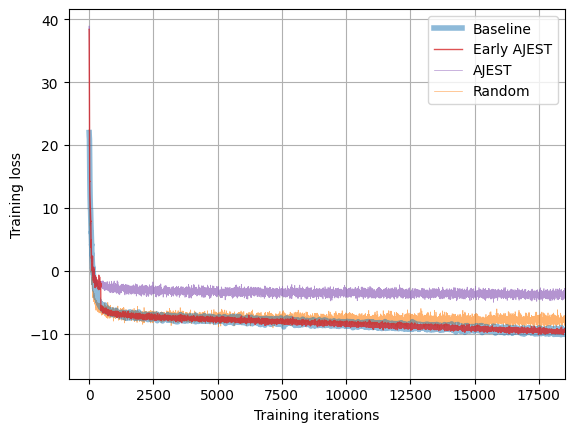

In [140]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["epoch"][s]["epoch"], results["epoch"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Training iterations")
plt.ylabel("Training loss")
plt.xlim([-800, 18500])
plt.grid()

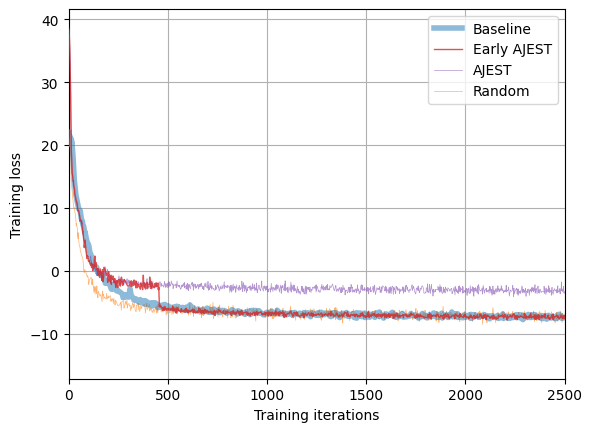

In [142]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["epoch"][s]["epoch"], results["epoch"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Training iterations")
plt.ylabel("Training loss")
plt.xlim([0, 2500])
plt.grid()

## Images seen

### Load data into Pandas

In [143]:
pandas_data = pd.read_csv(os.path.join(dir_results, "Main_Results_Loss_vs_Seen_Images.csv"))

In [144]:
pandas_data

,Seen images [kimg],Group: 06_CorrectEMA_AJEST_00 - _step,Group: 06_CorrectEMA_AJEST_00 - _step__MIN,Group: 06_CorrectEMA_AJEST_00 - _step__MAX,Group: 06_CorrectEMA_AJEST_00 - Loss,Group: 06_CorrectEMA_AJEST_00 - Loss__MIN,Group: 06_CorrectEMA_AJEST_00 - Loss__MAX,Group: 06_CorrectEMA_Early_AJEST_00 - _step,Group: 06_CorrectEMA_Early_AJEST_00 - _step__MIN,Group: 06_CorrectEMA_Early_AJEST_00 - _step__MAX,...,Group: 04_Tiny_LR_Baseline_04 - _step__MAX,Group: 04_Tiny_LR_Baseline_04 - Loss,Group: 04_Tiny_LR_Baseline_04 - Loss__MIN,Group: 04_Tiny_LR_Baseline_04 - Loss__MAX,Group: 04_Tiny_LR_Ref_00 - _step,Group: 04_Tiny_LR_Ref_00 - _step__MIN,Group: 04_Tiny_LR_Ref_00 - _step__MAX,Group: 04_Tiny_LR_Ref_00 - Loss,Group: 04_Tiny_LR_Ref_00 - Loss__MIN,Group: 04_Tiny_LR_Ref_00 - Loss__MAX
0,0.384,8.0,8.0,8.0,38.000744,38.000744,38.000744,8.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.768,18.0,18.0,18.0,37.824091,37.824091,37.824091,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.536,36.0,36.0,36.0,37.956989,37.645382,38.268596,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.920,45.0,45.0,45.0,35.902883,35.902883,35.902883,45.0,45.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73392,167596.032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,743988.0,-13.560675,-13.560675,-13.560675,NaN,NaN,NaN,NaN,NaN,NaN
73393,167600.128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,744006.0,-13.906603,-13.906603,-13.906603,NaN,NaN,NaN,NaN,NaN,NaN
73394,167604.224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,744024.0,-13.662324,-13.662324,-13.662324,NaN,NaN,NaN,NaN,NaN,NaN
73395,167608.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,744242.0,-14.272428,-14.272428,-14.272428,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocess with Pandas

In [145]:
for c in pandas_data.columns:
    condition = any([st in c for st in ["MIN", "MAX", "step"]])
    if condition: del pandas_data[c]

In [146]:
pandas_data = pandas_data.rename(columns={"Group: 06_CorrectEMA_AJEST_00 - Loss":"AJEST",
                                          "Group: 06_CorrectEMA_Early_AJEST_00 - Loss":"Early AJEST",
                                          "Group: 06_CorrectEMA_Random_00 - Loss":"Random",
                                          "Group: 04_Tiny_LR_Baseline_04 - Loss":"Baseline",
                                          "Group: 04_Tiny_LR_Ref_00 - Loss":"Reference"})

### Get data in Numpy

In [149]:
results["nimg"] = {}
for s in series:
    results["nimg"][s] = {}
    results["nimg"][s]["nimg"], results["nimg"][s]["loss"] = pandas_data[["Seen images [kimg]",s]][pd.notna(pandas_data[s])].to_numpy().T

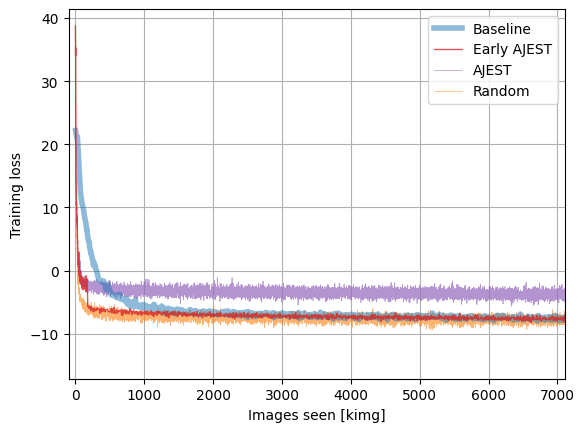

In [152]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["nimg"][s]["nimg"], results["nimg"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Images seen [kimg]")
plt.ylabel("Training loss")
plt.xlim([-100, 7104])
plt.grid()

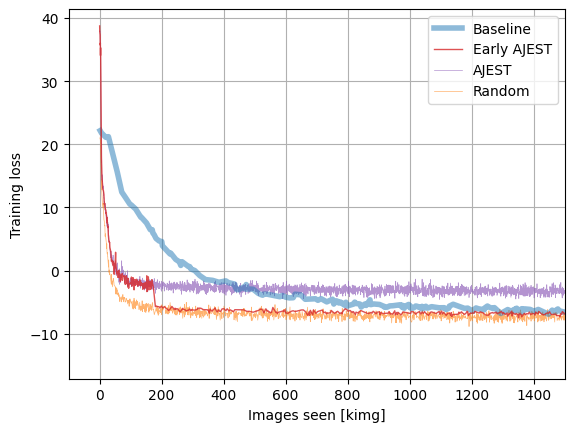

In [153]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["nimg"][s]["nimg"], results["nimg"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Images seen [kimg]")
plt.ylabel("Training loss")
plt.xlim([-100, 1500])
plt.grid()

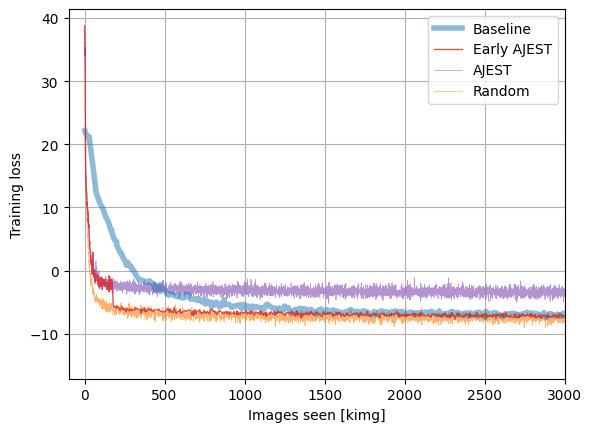

In [154]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["nimg"][s]["nimg"], results["nimg"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Images seen [kimg]")
plt.ylabel("Training loss")
plt.xlim([-100, 3000])
plt.grid()

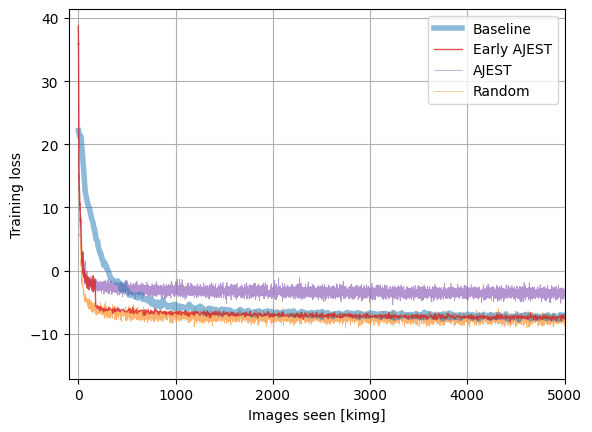

In [155]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["nimg"][s]["nimg"], results["nimg"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Images seen [kimg]")
plt.ylabel("Training loss")
plt.xlim([-100, 5000])
plt.grid()